Name: Anushree Patil

Github Username: Anushreepa

USC ID: 8671674031

## 1. Multi-class and Multi-Label Classification Using Support Vector Machines

Import packages

In [18]:
import numpy as np
import pandas as pd
from sklearn.pipeline import *
from sklearn.preprocessing import *
from sklearn.svm import *
from sklearn.model_selection import *
from sklearn.decomposition import *
from sklearn.linear_model import *
from sklearn.pipeline import *
from sklearn.metrics import *
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as imbpipe
from imblearn.over_sampling import SMOTE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

### (a) Download the Anuran Calls (MFCCs) Data Set

In [19]:
df = pd.read_csv('../data/Anuran Calls (MFCCs)/Frogs_MFCCs.csv')

In [20]:
df

MFCCs_ 1  MFCCs_ 2  MFCCs_ 3  MFCCs_ 4  MFCCs_ 5  MFCCs_ 6  MFCCs_ 7  \
0          1.0  0.152936 -0.105586  0.200722  0.317201  0.260764  0.100945   
1          1.0  0.171534 -0.098975  0.268425  0.338672  0.268353  0.060835   
2          1.0  0.152317 -0.082973  0.287128  0.276014  0.189867  0.008714   
3          1.0  0.224392  0.118985  0.329432  0.372088  0.361005  0.015501   
4          1.0  0.087817 -0.068345  0.306967  0.330923  0.249144  0.006884   
...        ...       ...       ...       ...       ...       ...       ...   
7190       1.0 -0.554504 -0.337717  0.035533  0.034511  0.443451  0.093889   
7191       1.0 -0.517273 -0.370574  0.030673  0.068097  0.402890  0.096628   
7192       1.0 -0.582557 -0.343237  0.029468  0.064179  0.385596  0.114905   
7193       1.0 -0.519497 -0.307553 -0.004922  0.072865  0.377131  0.086866   
7194       1.0 -0.508833 -0.324106  0.062068  0.078211  0.397188  0.094596   

      MFCCs_ 8  MFCCs_ 9  MFCCs_10  ...  MFCCs_17  MFCCs_18  MFCCs_19  \
0    -0.150063 -0.171128  0.124676  ... -0.108351 -0.077623 -0.009568   
1    -0.222475 -0.207693  0.170883  ... -0.090974 -0.056510 -0.035303   
2    -0.242234 -0.219153  0.232538  ... -0.050691 -0.023590 -0.066722   
3    -0.194347 -0.098181  0.270375  ... -0.136009 -0.177037 -0.130498   
4    -0.265423 -0.172700  0.266434  ... -0.048885 -0.053074 -0.088550   
...        ...       ...       ...  ...       ...       ...       ...   
7190 -0.100753  0.037087  0.081075  ...  0.069430  0.071001  0.021591   
7191 -0.116460  0.063727  0.089034  ...  0.061127  0.068978  0.017745   
7192 -0.103317  0.070370  0.081317  ...  0.082474  0.077771 -0.009688   
7193 -0.115799  0.056979  0.089316  ...  0.051796  0.069073  0.017963   
7194 -0.117672  0.058874  0.076180  ...  0.061455  0.072983 -0.003980   

      MFCCs_20  MFCCs_21  MFCCs_22           Family      Genus  \
0     0.057684  0.118680  0.014038  Leptodactylidae  Adenomera   
1     0.020140  0.082263  0.029056  Leptodactylidae  Adenomera   
2    -0.025083  0.099108  0.077162  Leptodactylidae  Adenomera   
3    -0.054766 -0.018691  0.023954  Leptodactylidae  Adenomera   
4    -0.031346  0.108610  0.079244  Leptodactylidae  Adenomera   
...        ...       ...       ...              ...        ...   
7190  0.052449 -0.021860 -0.079860          Hylidae     Scinax   
7191  0.046461 -0.015418 -0.101892          Hylidae     Scinax   
7192  0.027834 -0.000531 -0.080425          Hylidae     Scinax   
7193  0.041803 -0.027911 -0.096895          Hylidae     Scinax   
7194  0.031560 -0.029355 -0.087910          Hylidae     Scinax   

             Species  RecordID  
0     AdenomeraAndre         1  
1     AdenomeraAndre         1  
2     AdenomeraAndre         1  
3     AdenomeraAndre         1  
4     AdenomeraAndre         1  
...              ...       ...  
7190     ScinaxRuber        60  
7191     ScinaxRuber        60  
7192     ScinaxRuber        60  
7193     ScinaxRuber        60  
7194     ScinaxRuber        60  

[7195 rows x 26 columns]

In [21]:
df = df.drop('RecordID',axis=1)

In [22]:
df_train, df_test = train_test_split(df , test_size=0.3 , random_state=65)

In [23]:
df_train

MFCCs_ 1  MFCCs_ 2  MFCCs_ 3  MFCCs_ 4  MFCCs_ 5  MFCCs_ 6  MFCCs_ 7  \
2860       1.0  0.372846  0.208395  0.523806  0.215120  0.029952 -0.132342   
4258       1.0  0.145449  0.215023  0.688683  0.192779  0.067867 -0.044627   
5902       1.0  0.017638  0.574601  0.366787  0.174042  0.248987  0.030421   
3687       1.0  0.455788  0.266005  0.453091  0.133281  0.039227 -0.067088   
6616       1.0  0.382381  0.975087  0.352274 -0.339304  0.325331  0.309973   
...        ...       ...       ...       ...       ...       ...       ...   
3399       1.0  0.072040  0.014968  0.424995  0.186217  0.138088 -0.042511   
2773       1.0  0.435561  0.315041  0.523422  0.210531  0.092978 -0.079414   
296        1.0  0.232867 -0.123160  0.051842  0.251865  0.213494  0.110496   
575        1.0  0.548363  0.641112  0.463094 -0.177837  0.016785  0.421294   
2165       1.0  0.021454  0.052395  0.657941  0.316657  0.030847 -0.230644   

      MFCCs_ 8  MFCCs_ 9  MFCCs_10  ...  MFCCs_16  MFCCs_17  MFCCs_18  \
2860  0.041710  0.268974  0.104378  ... -0.010830  0.154577  0.065739   
4258  0.082023  0.207315  0.004216  ...  0.299766  0.159250 -0.076507   
5902 -0.162329  0.021228  0.076210  ...  0.068277  0.092015  0.004094   
3687 -0.020738  0.159228  0.070951  ...  0.073588  0.230523  0.036632   
6616 -0.210228 -0.052096  0.214104  ... -0.053583  0.122622  0.029159   
...        ...       ...       ...  ...       ...       ...       ...   
3399  0.043313  0.256479  0.095686  ...  0.015478  0.225383  0.086081   
2773  0.049131  0.316478  0.057628  ...  0.100165  0.211904  0.038775   
296   0.063588  0.065908 -0.068906  ... -0.219120 -0.405825 -0.214225   
575  -0.028175 -0.251436  0.214758  ... -0.120899  0.144852  0.160001   
2165 -0.080967  0.262931  0.075163  ...  0.141657  0.120013 -0.073545   

      MFCCs_19  MFCCs_20  MFCCs_21  MFCCs_22           Family          Genus  \
2860 -0.027702 -0.058834  0.044859  0.158082  Leptodactylidae      Adenomera   
4258 -0.077418 -0.077509  0.118048  0.254046  Leptodactylidae      Adenomera   
5902  0.026702  0.021985 -0.062275  0.019975          Hylidae      Hypsiboas   
3687 -0.100659 -0.103979 -0.013520  0.195576  Leptodactylidae      Adenomera   
6616 -0.025463  0.056153  0.025304 -0.002761  Leptodactylidae  Leptodactylus   
...        ...       ...       ...       ...              ...            ...   
3399 -0.098031 -0.170851  0.011014  0.235460  Leptodactylidae      Adenomera   
2773 -0.109970 -0.189782 -0.014183  0.176583  Leptodactylidae      Adenomera   
296   0.135463  0.175999  0.039492 -0.017565  Leptodactylidae      Adenomera   
575  -0.105940 -0.049494  0.044525 -0.057884  Leptodactylidae      Adenomera   
2165 -0.064542 -0.022730  0.139249  0.127236  Leptodactylidae      Adenomera   

                     Species  
2860  AdenomeraHylaedactylus  
4258  AdenomeraHylaedactylus  
5902       HypsiboasCordobae  
3687  AdenomeraHylaedactylus  
6616     LeptodactylusFuscus  
...                      ...  
3399  AdenomeraHylaedactylus  
2773  AdenomeraHylaedactylus  
296           AdenomeraAndre  
575           AdenomeraAndre  
2165  AdenomeraHylaedactylus  

[5036 rows x 25 columns]

### (b) Train a classifier for each label

#### (i) Research

Exact Match:

This metric measures the accuracy of the classifier in terms of the percentage of samples where all the predicted labels exactly match the true labels. The exact match score is calculated as:

Exact Match Score = (Number of correctly classified samples) / (Total number of samples)

Hamming Loss:

The Hamming loss is the fraction of labels that are incorrectly predicted.

Hamming Loss = (Number of wrongly classified labels) / (Total number of labels)

Hamming Score:

This metric measures the distance between the predicted labels and the true labels. The Hamming score is calculated as:

Hamming Score = (Number of correctly classified labels) / (Total number of labels)

#### (ii) Train a SVM for each of the labels

In [24]:
train_y_family = df_train['Family']
train_y_genus = df_train['Genus']
train_y_species = df_train['Species']
train_x = df_train.drop(['Family','Genus','Species'],axis=1)
train_y = pd.concat([train_y_family, train_y_genus, train_y_species], axis=1)
test_y_family = df_test['Family']
test_y_genus = df_test['Genus']
test_y_species = df_test['Species']
test_x = df_test.drop(['Family','Genus','Species'],axis=1)
test_y = pd.concat([test_y_family, test_y_genus, test_y_species], axis=1)

In [25]:
train_x.shape

(5036, 22)

In [26]:
test_x.shape

(2159, 22)

In [27]:
test_y

Family      Genus                 Species
1704  Leptodactylidae  Adenomera  AdenomeraHylaedactylus
4257  Leptodactylidae  Adenomera  AdenomeraHylaedactylus
1291  Leptodactylidae  Adenomera  AdenomeraHylaedactylus
5326          Hylidae  Hypsiboas    HypsiboasCinerascens
6589          Hylidae  Hypsiboas       HypsiboasCordobae
...               ...        ...                     ...
3940  Leptodactylidae  Adenomera  AdenomeraHylaedactylus
3908  Leptodactylidae  Adenomera  AdenomeraHylaedactylus
995     Dendrobatidae   Ameerega      Ameeregatrivittata
3834  Leptodactylidae  Adenomera  AdenomeraHylaedactylus
6200          Hylidae  Hypsiboas       HypsiboasCordobae

[2159 rows x 3 columns]

In [28]:
def HammingScore(y_predict, y_true):
    count = 0
    y_predict = y_predict.reset_index().iloc[:,1:]
    y_true = y_true.reset_index().iloc[:,1:]
    instances = y_predict.shape[0]
    for i, row in enumerate(y_predict.iterrows()):
        if y_predict.loc[i].tolist() == y_true.loc[i].tolist():
            count += 1
    return count/instances

def exact_match(y_test,y_pred):
    return np.all(y_pred.to_numpy() == y_test.to_numpy(), axis=1).mean()

### Gaussian SVM Kernel

In [29]:
param_grid = {
   'C': [10**i for i in range(-3,3)],
   'gamma': [i/10 for i in range(1,20)],
}

grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv = 10)
grid_search.fit(train_x, train_y_family)

print("Best parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)
y_pred_family = grid_search.predict(test_x)
y_pred_family = pd.DataFrame(y_pred_family)

Best parameters: {'C': 100, 'gamma': 1.7}
Best Score: 0.99185955694405


In [30]:
param_grid = {
    'C': [10**i for i in range(-3,3)],
    'gamma': [i/10 for i in range(1,20)],
}

grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv = 10)
grid_search.fit(train_x, train_y_genus)
    
print("Best parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)
y_pred_genus = grid_search.predict(test_x)
y_pred_genus = pd.DataFrame(y_pred_genus)

Best parameters: {'C': 100, 'gamma': 1.9}
Best Score: 0.9916611442456373


In [31]:
param_grid = {
    'C': [10**i for i in range(-3,3)],
    'gamma': [i/10 for i in range(1,20)],
}

grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv = 10)
grid_search.fit(train_x, train_y_species)
    
print("Best parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)
y_pred_species = grid_search.predict(test_x)
y_pred_species = pd.DataFrame(y_pred_species)

Best parameters: {'C': 10, 'gamma': 1.4}
Best Score: 0.9914631260058695


In [32]:
y_pred = pd.concat([y_pred_family, y_pred_genus, y_pred_species], axis = 1)
hamm_score = HammingScore(y_pred, test_y)
print("Hamming Score:", hamm_score)
print("Hamming Loss:", 1-hamm_score)

Hamming Score: 0.983788791106994
Hamming Loss: 0.01621120889300598


In [33]:
em = exact_match(test_y , y_pred)
print("Exact Match:", em)

Exact Match: 0.983788791106994


#### (iii) Repeat 1(b)ii with L1-penalized SVMs

In [34]:
scaler = StandardScaler()
train_x_scaled = scaler.fit_transform(train_x)
test_x_scaled = scaler.transform(test_x)

In [35]:
param_grid = [{'C': [10**i for i in range(-3,3)]}]
grid_search = GridSearchCV(LinearSVC(penalty = 'l1', loss = 'squared_hinge', dual = False, max_iter = 1000000),
                              param_grid, scoring = 'accuracy', cv = 10)
grid_search.fit(train_x_scaled, train_y_family)
print('Best parameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)
y_pred_family = grid_search.predict(test_x_scaled)
y_pred_family = pd.DataFrame(y_pred_family)

Best parameters: {'C': 1}
Best score: 0.9370586007762947


In [36]:
param_grid = [{'C': [10**i for i in range(-3,3)]}]
grid_search = GridSearchCV(LinearSVC(penalty = 'l1', loss = 'squared_hinge', dual = False, max_iter = 1000000),
                              param_grid, scoring = 'accuracy', cv = 10)
grid_search.fit(train_x_scaled, train_y_genus)
print('Best parameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)
y_pred_genus = grid_search.predict(test_x_scaled)
y_pred_genus = pd.DataFrame(y_pred_genus)

Best parameters: {'C': 10}
Best score: 0.9543315503802582


In [37]:
param_grid = [{'C': [10**i for i in range(-3,3)]}]
grid_search = GridSearchCV(LinearSVC(penalty = 'l1', loss = 'squared_hinge', dual = False, max_iter = 1000000),
                              param_grid, scoring = 'accuracy', cv = 10)
grid_search.fit(train_x_scaled, train_y_species)
print('Best parameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)
y_pred_species = grid_search.predict(test_x_scaled)
y_pred_species = pd.DataFrame(y_pred_species)

Best parameters: {'C': 10}
Best score: 0.9594930417495029


In [38]:
y_pred = pd.concat([y_pred_family, y_pred_genus, y_pred_species], axis = 1)
hamm_score = HammingScore(y_pred, test_y)
print("Hamming Score:", hamm_score)
print("Hamming Loss:", 1-hamm_score)

Hamming Score: 0.9212598425196851
Hamming Loss: 0.07874015748031493


In [39]:
em = exact_match(test_y , y_pred)
print("Exact Match:", em)

Exact Match: 0.9212598425196851


#### (iv) Repeat 1(b)iii by using SMOTE or any other method for imbalance

In [40]:
linear_svc = LinearSVC(penalty = 'l1', loss = 'squared_hinge', dual = False, max_iter = 1000000)
pipe = imbpipe([
    ('smote',SMOTE()),
    ('scale', StandardScaler()),
    ('linear', linear_svc)])
params_grid = [{'linear__C':[10**i for i in range(-3,3)]}]
stratified_cv = StratifiedKFold(n_splits = 10)    
grid_search = GridSearchCV(pipe, param_grid = params_grid, cv = stratified_cv)
grid_search.fit(train_x_scaled, train_y_family)
print('Best parameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)
y_pred_family = grid_search.predict(test_x_scaled)
y_pred_family = pd.DataFrame(y_pred_family)

Best parameters: {'linear__C': 10}
Best score: 0.9215725488339801


In [41]:
linear_svc = LinearSVC(penalty = 'l1', loss = 'squared_hinge', dual = False, max_iter = 1000000)
pipe = imbpipe([
    ('smote',SMOTE()),
    ('scale', StandardScaler()),
    ('linear', linear_svc)])
params_grid = [{'linear__C':[10**i for i in range(-3,3)]}]
stratified_cv = StratifiedKFold(n_splits = 10)
grid_search = GridSearchCV(pipe, param_grid = params_grid, cv = stratified_cv)
grid_search.fit(train_x_scaled, train_y_genus)
print('Best parameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)
y_pred_genus = grid_search.predict(test_x_scaled)
y_pred_genus = pd.DataFrame(y_pred_genus)

Best parameters: {'linear__C': 1}
Best score: 0.9171952412509073


In [42]:
linear_svc = LinearSVC(penalty = 'l1', loss = 'squared_hinge', dual = False, max_iter = 1000000)
pipe = imbpipe([
    ('smote',SMOTE()),
    ('scale', StandardScaler()),
    ('linear', linear_svc)])
params_grid = [{'linear__C':[10**i for i in range(-3,3)]}]
stratified_cv = StratifiedKFold(n_splits = 10)
grid_search = GridSearchCV(pipe, param_grid = params_grid, cv = stratified_cv)
grid_search.fit(train_x_scaled, train_y_species)
print('Best parameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)
y_pred_species = grid_search.predict(test_x_scaled)
y_pred_species = pd.DataFrame(y_pred_species)

Best parameters: {'linear__C': 0.01}
Best score: 0.9543299725456784


In [43]:
y_pred = pd.concat([y_pred_family, y_pred_genus, y_pred_species], axis = 1)
hamm_score = HammingScore(y_pred, test_y)
print("Hamming Score:", hamm_score)
print("Hamming Loss:", 1-hamm_score)

Hamming Score: 0.8545622973598889
Hamming Loss: 0.14543770264011113


In [44]:
em = exact_match(test_y , y_pred)
print("Exact Match:", em)

Exact Match: 0.8545622973598889


As we can see based on Hamming Scores, the Gaussian Kernel works better than the L1 penalized SVM which works better than L1 penalized SVM with SMOTE.

## 2. K-Means Clustering on a Multi-Class and Multi-Label Data Set

### (a) Use k-means clustering

### (b) Determine which family is the majority

In [45]:
df_y_family = df['Family']
df_y_genus = df['Genus']
df_y_species = df['Species']
df_x = df.drop(['Family','Genus','Species'],axis=1)

In [46]:
df_y = pd.concat([df_y_family, df_y_genus, df_y_species], axis = 1)

In [47]:
labels = ['Family', 'Genus', 'Species']

In [48]:
def monte_hamming_loss(y_test,y_pred):
    outputs = []
    labels = y_pred.keys()
    for label in labels:
        outputs.append(hamming_loss([y_test[label]],[y_pred[label]]))
    return np.mean(outputs)

def monte_hamming_distance(y_test,y_pred):
    outputs = []
    labels = y_pred.keys()
    for label in labels:
        outputs.append(hamming_loss([y_test[label]],[y_pred[label]]))
    return np.sum(outputs)

In [49]:
def opt_k():
    range_n_clusters = range(2,5)
    best_K,best_score = 1,0
    for n_clusters in range_n_clusters:
        clusterer = KMeans(n_clusters=n_clusters,init='random')
        preds = clusterer.fit_predict(df_x)
        centers = clusterer.cluster_centers_

        score = silhouette_score(df_x, preds)
        if score > best_score:
            best_score = score
            best_K = n_clusters
    return best_K, best_score

In [50]:
mcs_hamming_distances = []
mcs_hamming_losses = []
for i in range(0,50):
    print('Iteration',i,':')
    best_K,best_score = opt_k()
    print('Best k:',best_K,'Silhouette Score:',best_score)
    clusterer = KMeans(n_clusters=best_K)
    preds = clusterer.fit_predict(df_x)
    centers = clusterer.cluster_centers_

    pred_labels = dict()
    for k in range(best_K):
        pred_labels[k] = dict()
        for label in labels:
            pred_labels[k][label] = dict()


    for i in range(len(preds)):
        k = preds[i]
        for label in labels:
            true_label = df.iloc[i][label]
            pred_labels[k][label][true_label] = pred_labels[k][label].get(true_label,0)+1

    majority_labels = dict()
    for k in pred_labels:
        majority_labels[k] = dict()
        for label in labels:
            majority,major_class = 0,'wrong'

            for key in pred_labels[k][label]:
                val = pred_labels[k][label][key]
                if val > majority:
                    majority = val
                    major_class = key

            majority_labels[k][label] = major_class
    
    
    print('Majority labels:',majority_labels)
    hamming_loss_arr = []
    hamming_distance_arr = []
    for i in range(len(df)):
        hamming_loss_arr.append(monte_hamming_loss(df[labels].iloc[i],majority_labels[preds[i]]))
        hamming_distance_arr.append(monte_hamming_distance(df[labels].iloc[i],majority_labels[preds[i]]))

    avg_hamming_loss = np.mean(hamming_loss_arr)
    avg_hamming_distance = np.mean(hamming_distance_arr)
    print('Average hamming loss:',avg_hamming_loss)
    print('Average hamming distance:',avg_hamming_distance)
    print('Average hamming score:',1 - avg_hamming_loss)
    print('-----------------------------------------------')
    mcs_hamming_distances.append(avg_hamming_distance)
    mcs_hamming_losses.append(avg_hamming_loss)

Iteration 0 :
Best k: 4 Silhouette Score: 0.37863353074850936
Majority labels: {0: {'Family': 'Dendrobatidae', 'Genus': 'Ameerega', 'Species': 'Ameeregatrivittata'}, 1: {'Family': 'Leptodactylidae', 'Genus': 'Adenomera', 'Species': 'AdenomeraHylaedactylus'}, 2: {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCordobae'}, 3: {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCinerascens'}}
Average hamming loss: 0.22242297892054666
Average hamming distance: 0.66726893676164
Average hamming score: 0.7775770210794534
-----------------------------------------------
Iteration 1 :
Best k: 4 Silhouette Score: 0.3787509343305295
Majority labels: {0: {'Family': 'Dendrobatidae', 'Genus': 'Ameerega', 'Species': 'Ameeregatrivittata'}, 1: {'Family': 'Leptodactylidae', 'Genus': 'Adenomera', 'Species': 'AdenomeraHylaedactylus'}, 2: {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCinerascens'}, 3: {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'Hyp

Best k: 4 Silhouette Score: 0.3787509343305295
Majority labels: {0: {'Family': 'Leptodactylidae', 'Genus': 'Adenomera', 'Species': 'AdenomeraHylaedactylus'}, 1: {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCinerascens'}, 2: {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCordobae'}, 3: {'Family': 'Dendrobatidae', 'Genus': 'Ameerega', 'Species': 'Ameeregatrivittata'}}
Average hamming loss: 0.22242297892054666
Average hamming distance: 0.66726893676164
Average hamming score: 0.7775770210794534
-----------------------------------------------
Iteration 15 :
Best k: 4 Silhouette Score: 0.3787509343305295
Majority labels: {0: {'Family': 'Leptodactylidae', 'Genus': 'Adenomera', 'Species': 'AdenomeraHylaedactylus'}, 1: {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCordobae'}, 2: {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCordobae'}, 3: {'Family': 'Leptodactylidae', 'Genus': 'Adenomera', 'Species': 'AdenomeraAndre'}}


Best k: 4 Silhouette Score: 0.3787509343305295
Majority labels: {0: {'Family': 'Leptodactylidae', 'Genus': 'Adenomera', 'Species': 'AdenomeraHylaedactylus'}, 1: {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCordobae'}, 2: {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCinerascens'}, 3: {'Family': 'Dendrobatidae', 'Genus': 'Ameerega', 'Species': 'Ameeregatrivittata'}}
Average hamming loss: 0.22228399351401434
Average hamming distance: 0.6668519805420431
Average hamming score: 0.7777160064859856
-----------------------------------------------
Iteration 29 :
Best k: 4 Silhouette Score: 0.3787509343305295
Majority labels: {0: {'Family': 'Leptodactylidae', 'Genus': 'Adenomera', 'Species': 'AdenomeraHylaedactylus'}, 1: {'Family': 'Dendrobatidae', 'Genus': 'Ameerega', 'Species': 'Ameeregatrivittata'}, 2: {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCinerascens'}, 3: {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCordob

Best k: 4 Silhouette Score: 0.37863353074850936
Majority labels: {0: {'Family': 'Dendrobatidae', 'Genus': 'Ameerega', 'Species': 'Ameeregatrivittata'}, 1: {'Family': 'Leptodactylidae', 'Genus': 'Adenomera', 'Species': 'AdenomeraHylaedactylus'}, 2: {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCinerascens'}, 3: {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCordobae'}}
Average hamming loss: 0.22242297892054666
Average hamming distance: 0.66726893676164
Average hamming score: 0.7775770210794534
-----------------------------------------------
Iteration 43 :
Best k: 4 Silhouette Score: 0.3787509343305295
Majority labels: {0: {'Family': 'Leptodactylidae', 'Genus': 'Adenomera', 'Species': 'AdenomeraHylaedactylus'}, 1: {'Family': 'Dendrobatidae', 'Genus': 'Ameerega', 'Species': 'Ameeregatrivittata'}, 2: {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCordobae'}, 3: {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCinerascen

In [51]:
majority_labels

{0: {'Family': 'Leptodactylidae',
  'Genus': 'Adenomera',
  'Species': 'AdenomeraHylaedactylus'},
 1: {'Family': 'Dendrobatidae',
  'Genus': 'Ameerega',
  'Species': 'Ameeregatrivittata'},
 2: {'Family': 'Hylidae',
  'Genus': 'Hypsiboas',
  'Species': 'HypsiboasCinerascens'},
 3: {'Family': 'Hylidae',
  'Genus': 'Hypsiboas',
  'Species': 'HypsiboasCordobae'}}

### (c) Calculate the average Hamming distance, Hamming score, and Hamming loss

In [52]:
print('Avreage of 50 hamming distances:',np.mean(mcs_hamming_distances))
print('Standard deviation of 50 hamming distances:',np.std(mcs_hamming_distances))

Avreage of 50 hamming distances: 0.6889006254343292
Standard deviation of 50 hamming distances: 0.05850057238031012


In [53]:
print('Average of hamming loss of 50 iterations:',np.mean(mcs_hamming_losses))
print('Standard deviation of hamming distance of 50 iterations:',np.std(mcs_hamming_losses))

Average of hamming loss of 50 iterations: 0.22963354181144313
Standard deviation of hamming distance of 50 iterations: 0.019500190793436706


In [54]:
mcs_hamming_scores = np.subtract(1,mcs_hamming_losses)

In [55]:
print('Average of hamming score of 50 iterations:',np.mean(mcs_hamming_scores))
print('Standard deviation of hamming distance of 50 iterations:',np.std(mcs_hamming_scores))

Average of hamming score of 50 iterations: 0.770366458188557
Standard deviation of hamming distance of 50 iterations: 0.019500190793436702


## 3. ISLR 12.6.2

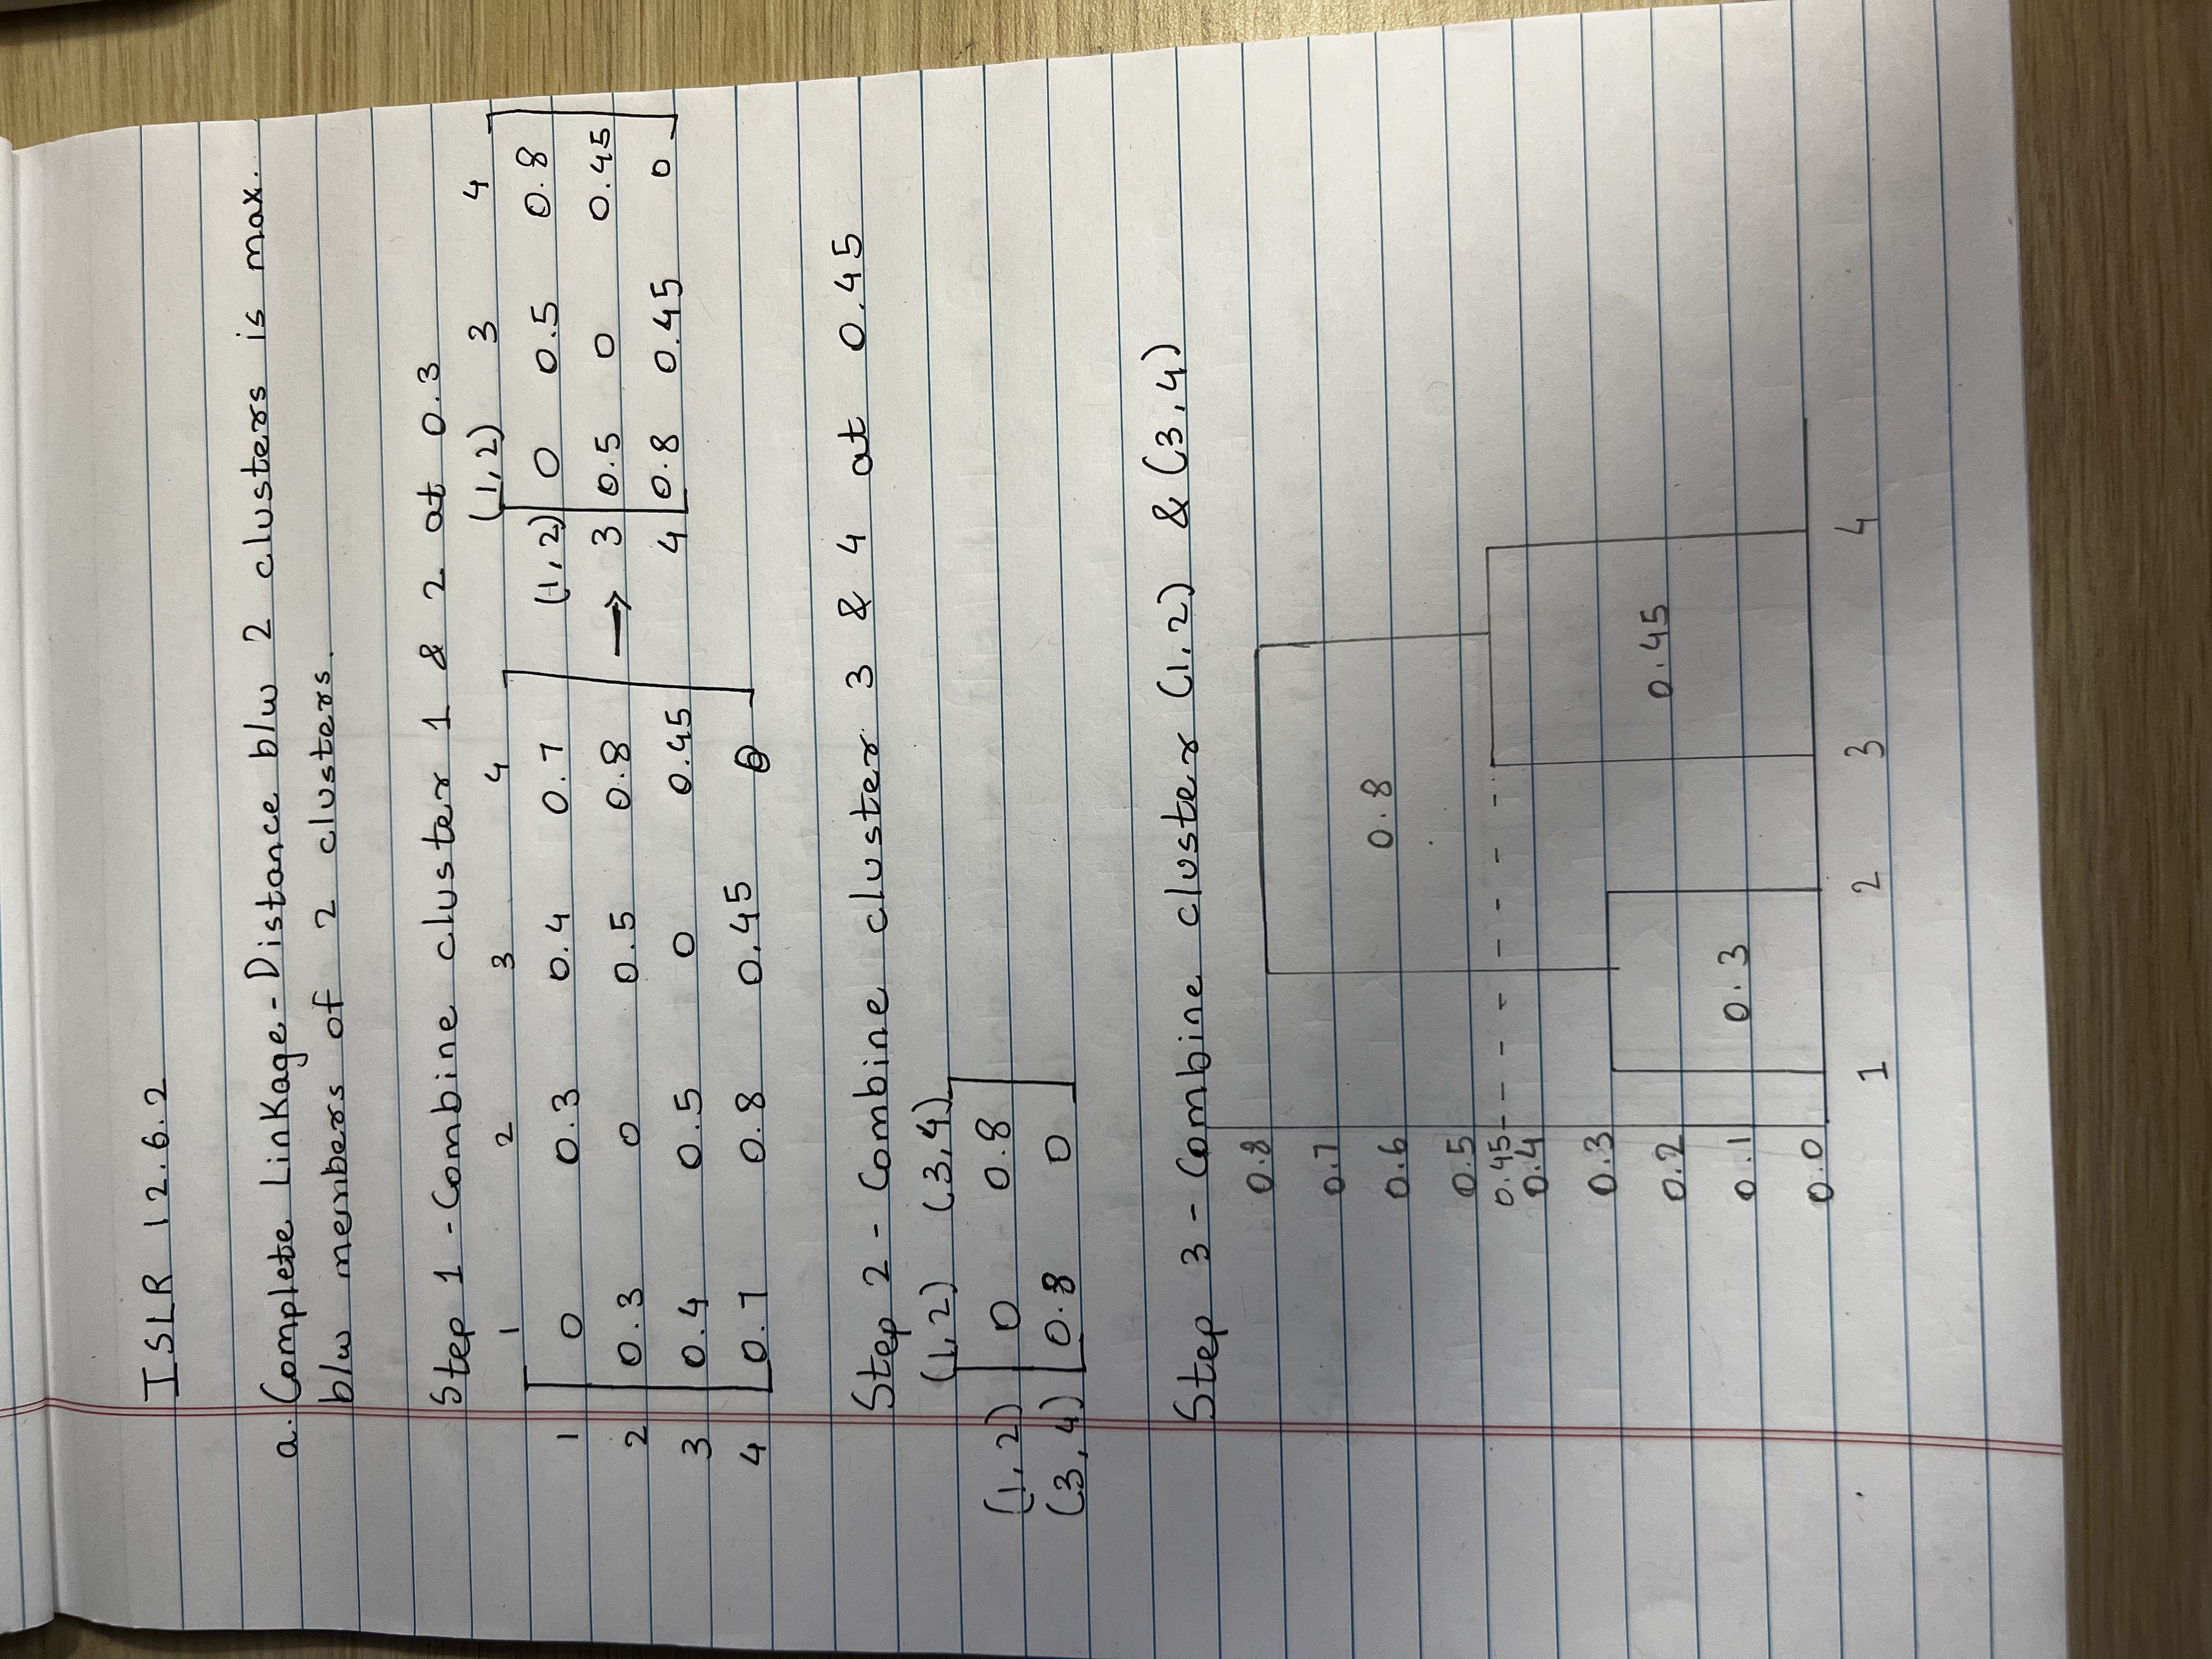

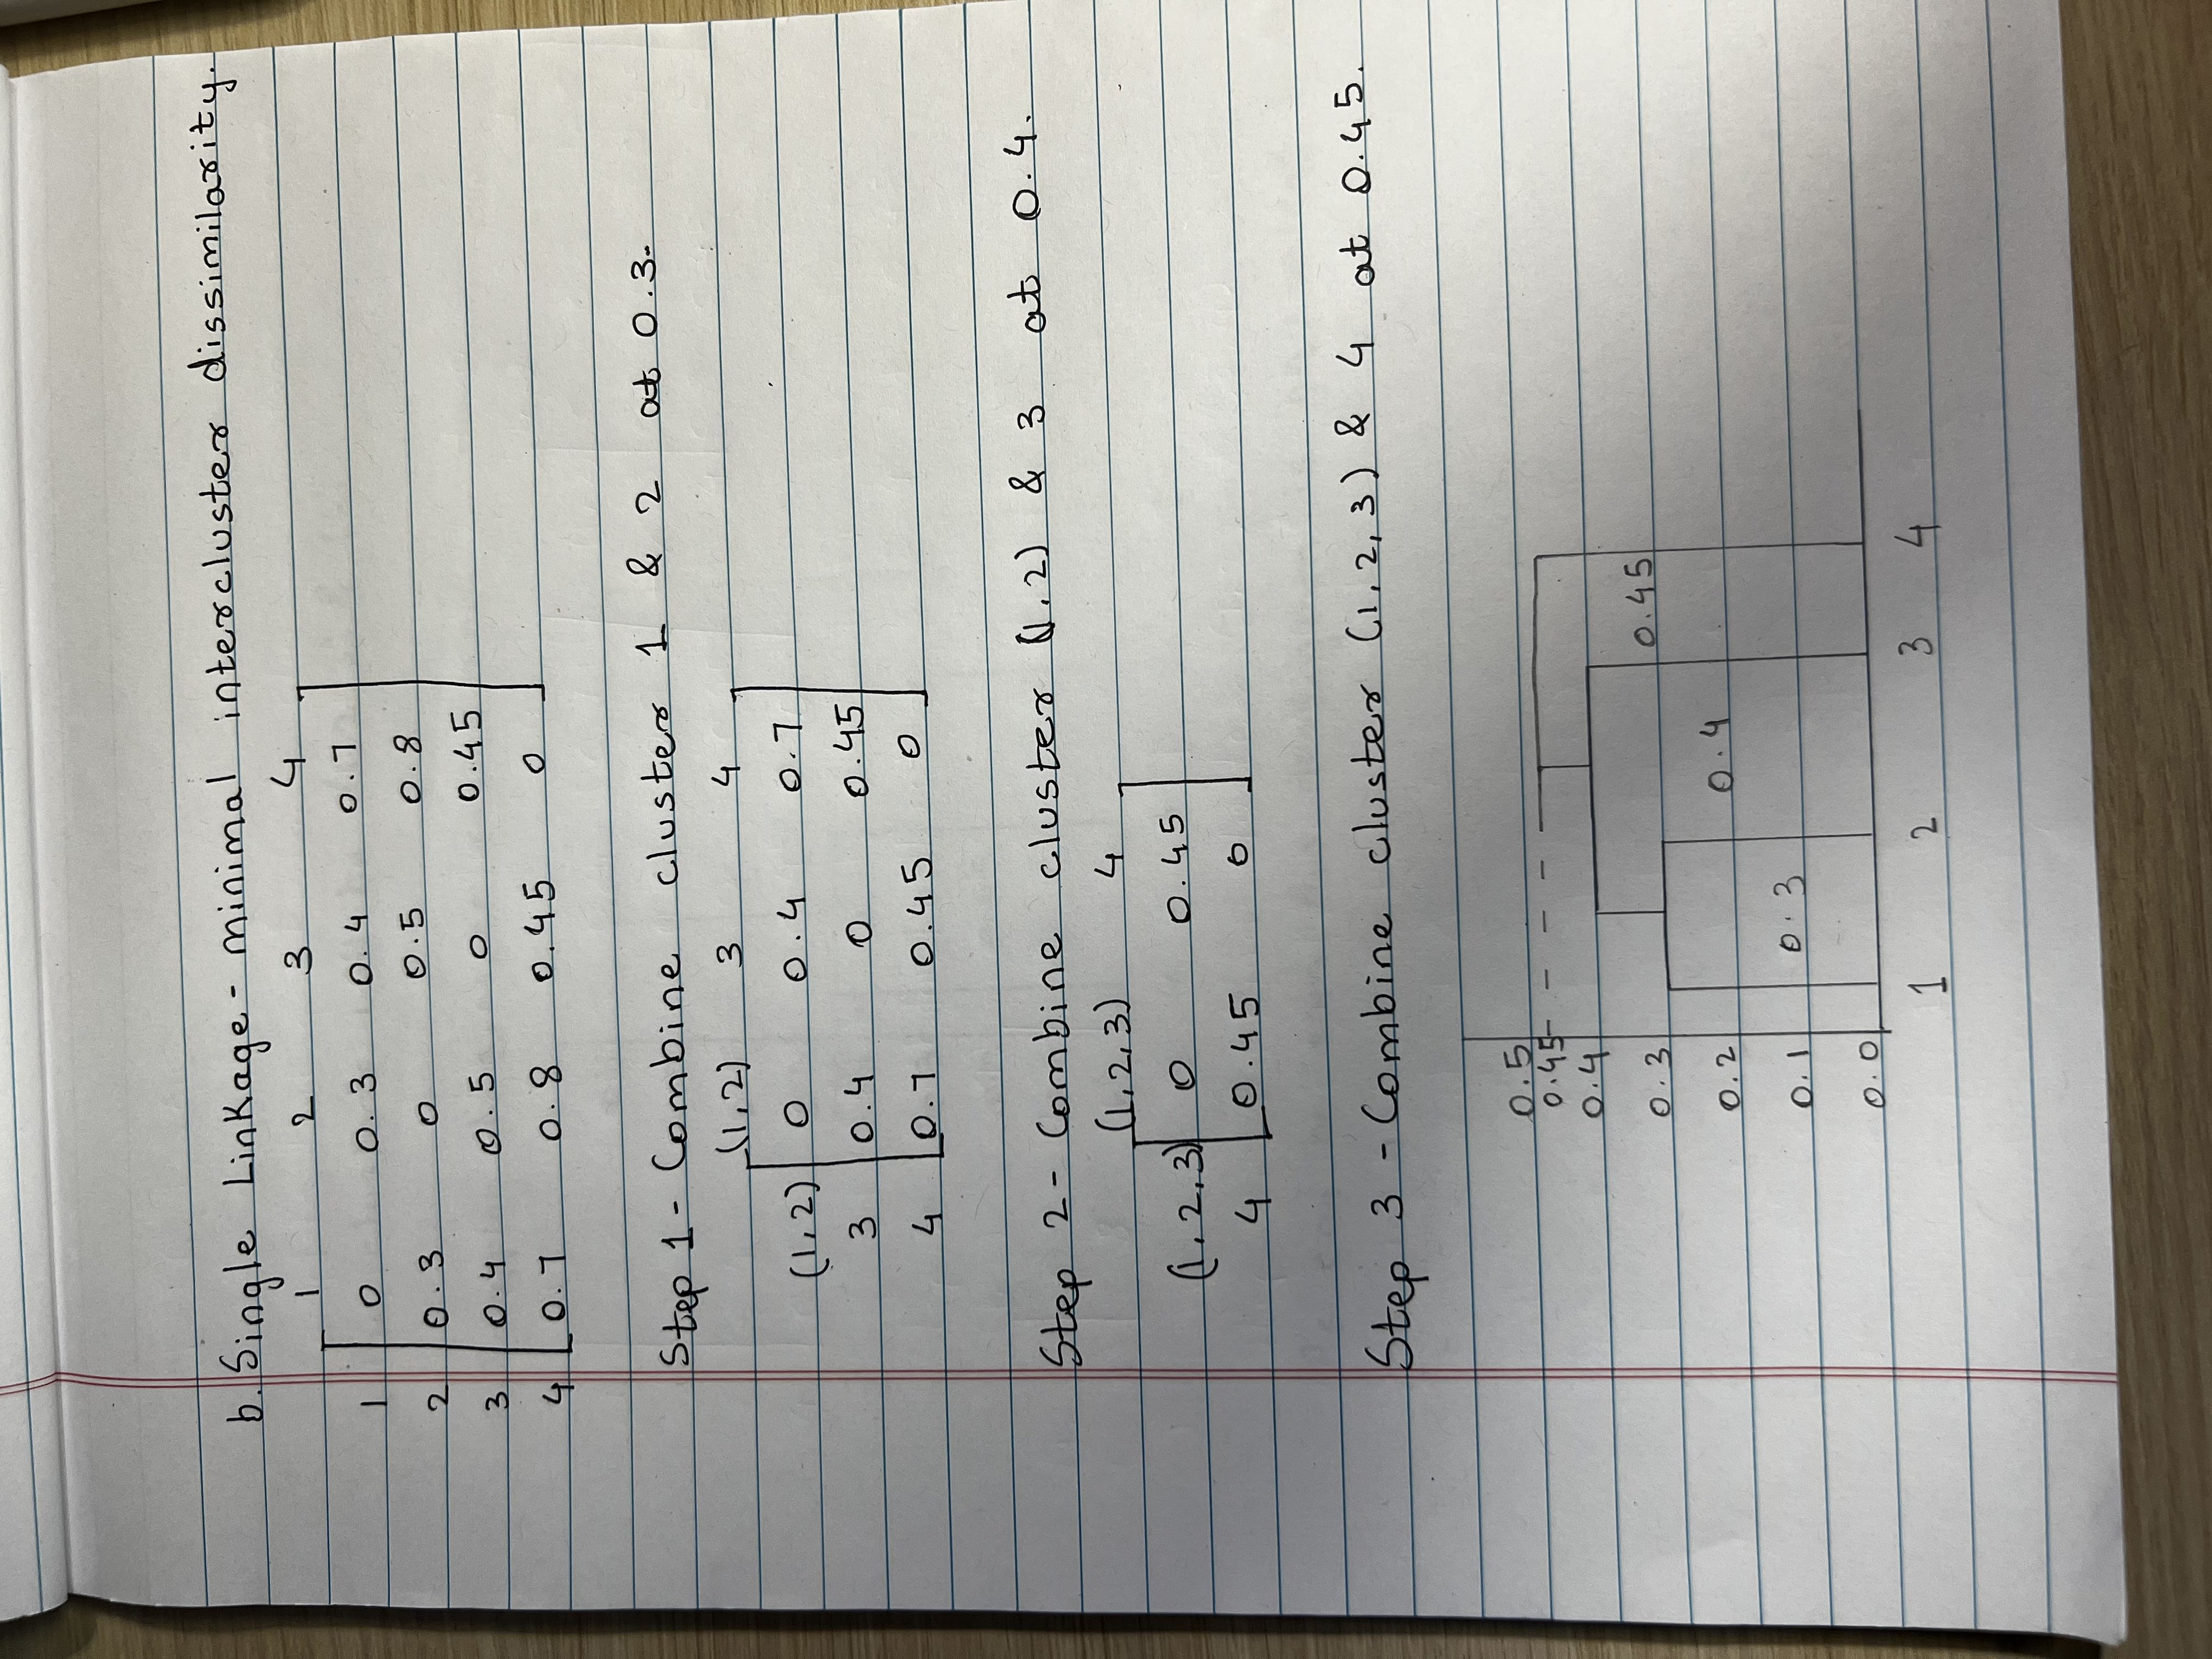

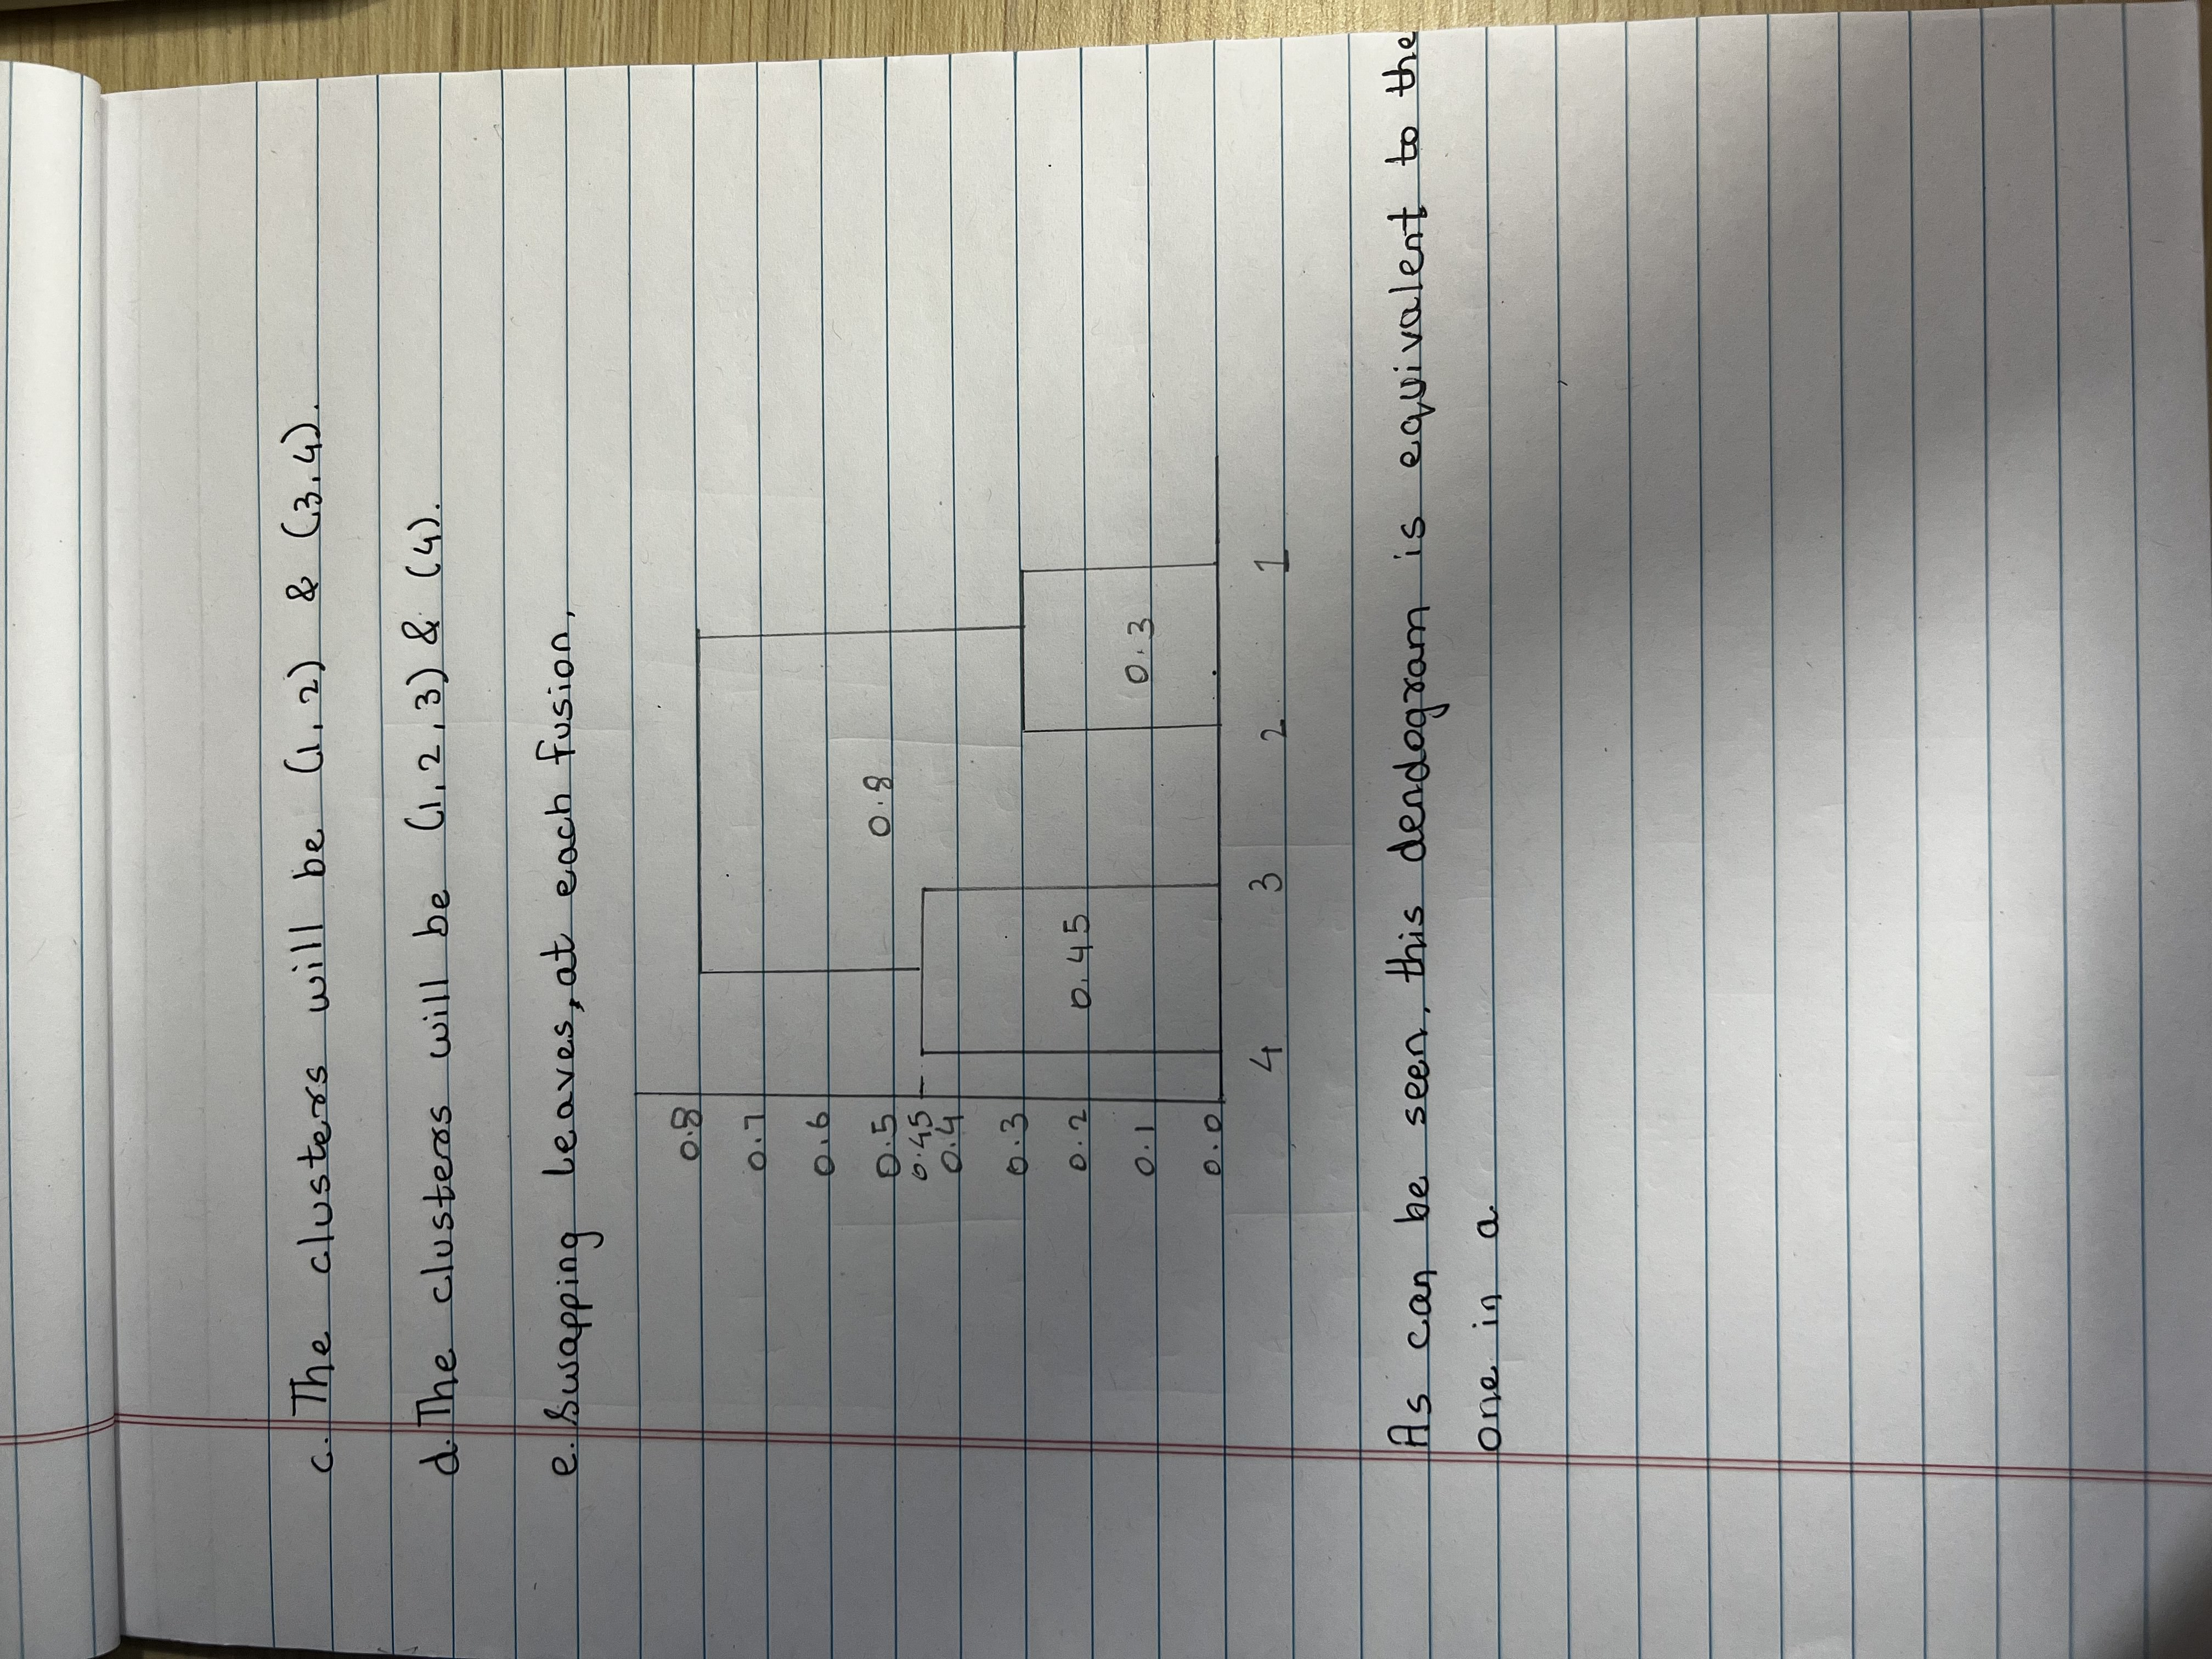

##### Citations:

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.hamming_loss.html

https://mmuratarat.github.io/2020-01-25/multilabel_classification_metrics